In [135]:
# Standart imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
# Keyword Extractor (YAKE)
import yake as yk

In [137]:
# Setup random seed
np.random.seed(42)

# Import data 
tomer_dataset = pd.read_csv("datasets/tomer-dataset.csv", encoding = "ISO-8859-1")
eli_dataset = pd.read_csv("datasets/eli-dataset.csv", encoding = "ISO-8859-1")

# Ignoring unnecessary columns 
tomer_dataset.drop("URL", axis=1, inplace=True)
tomer_dataset.drop("ID", axis=1, inplace=True)
tomer_dataset.drop("Unnamed: 5", axis=1, inplace=True)
eli_dataset.drop("URL", axis=1, inplace=True)
eli_dataset.drop("ID", axis=1, inplace=True)
eli_dataset.drop("Unnamed: 5", axis=1, inplace=True)

In [138]:
tomer_dataset

,Title,Body,Classification
0,AC2: Account Management -- Show All Accounts -...,#### Trigger When the user enters management m...,0.0
1,"AC1.1: Add an Account -- Launch to ""Add New"" o...","AC1.1: Add an Account -- Launch to ""Add New"" o...",0.0
2,Tor for Android,Tor for Android,0.0
3,Encrypt outgoing email to user's public key,Let the user specify his PGP or similar key in...,0.0
4,Timber logging in release builds,RiotX logs all Timber messages in release buil...,0.0
...,...,...,...
2808,"Web beacon/GIF poorly worded, unnecessary",Two issues with the Web Beacon section of the ...,NaN
2809,Please expand on my vital interests.,Paragraph two here: https://github.com/appdotn...,NaN
2810,"""may also obtain information"" is too broad","The sentence ""We may also obtain information f...",NaN
2811,"Rephrase ""is our asset"" to something about lic...",https://github.com/appdotnet/terms-of-service/...,NaN


In [139]:
eli_dataset

,Title,Body,Classification
0,AC2: Account Management -- Show All Accounts -...,#### Trigger When the user enters management m...,0.0
1,"AC1.1: Add an Account -- Launch to ""Add New"" o...",NaN,0.0
2,Tor for Android,NaN,0.0
3,Encrypt outgoing email to user's public key,Let the user specify his PGP or similar key in...,0.0
4,Timber logging in release builds,RiotX logs all Timber messages in release buil...,0.0
...,...,...,...
2808,"Web beacon/GIF poorly worded, unnecessary",Two issues with the Web Beacon section of the ...,NaN
2809,Please expand on my vital interests.,Paragraph two here: https://github.com/appdotn...,NaN
2810,"""may also obtain information"" is too broad","The sentence ""We may also obtain information f...",NaN
2811,"Rephrase ""is our asset"" to something about lic...",https://github.com/appdotnet/terms-of-service/...,NaN


In [140]:
# A set that contains only the annotated(1) violations
tomer_dataset_pv = tomer_dataset.loc[tomer_dataset.Classification == 1]
eli_dataset_pv = eli_dataset.loc[eli_dataset.Classification == 1]

In [141]:
tomer_dataset_pv.size, eli_dataset_pv.size

(192, 156)

In [142]:
# Keeping only the text columns
tomer_dataset_pv = tomer_dataset_pv.drop("Classification", axis=1)
eli_dataset_pv = eli_dataset_pv.drop("Classification", axis=1)

In [143]:
# Creating a string that contains all the data together 
data_to_string_tomer = tomer_dataset_pv.to_string() 
data_to_string_eli = eli_dataset_pv.to_string()

In [144]:
data_to_string_tomer

'                                                                                                                   Title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [145]:
data_to_string_eli

'                                                                                                                                         Title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [146]:
# Setting up Keyword Extractor
kw_extractor = yk.KeywordExtractor()

tomer_dataset_keywords = kw_extractor.extract_keywords(data_to_string_tomer)
eli_dataset_keywords = kw_extractor.extract_keywords(data_to_string_eli)

In [147]:
tomer_dataset_keywords

[('user', 0.0022842436875735207),
 ('Data', 0.004364497200806744),
 ('users', 0.005038772840235708),
 ('trips', 0.00669480424448753),
 ('trip data', 0.0072040733753593504),
 ('user enumeration settings', 0.007829483784654492),
 ('API', 0.0078403972820432),
 ('Respect user enumeration', 0.00821513105931493),
 ('group', 0.008306360730503948),
 ('information', 0.00881289105351472),
 ('Steps to reproduce', 0.010236009655001797),
 ('trip', 0.010376946578955671),
 ('Request', 0.012076814006125624),
 ('private', 0.01221366748025146),
 ('version', 0.012520524315247184),
 ('Metrics API', 0.01387457057951706),
 ('user enumeration', 0.014765290478037228),
 ('Describe', 0.014834794163726676),
 ('add', 0.0148429979201044),
 ('special group', 0.01497820382480693)]

In [148]:
eli_dataset_keywords

[('user', 0.0025028981053831657),
 ('users', 0.004667566737065904),
 ('private', 0.005622775182719267),
 ('user enumeration settings', 0.005689696296028704),
 ('Respect user enumeration', 0.005921285698857567),
 ('private transaction', 0.006708829798724889),
 ('trips', 0.0070490610849325485),
 ('group', 0.007494033290649175),
 ('data', 0.008300547288504961),
 ('trip data', 0.008746291696951259),
 ('trip', 0.011356820636835772),
 ('private transaction receipt', 0.011504158542744027),
 ('info', 0.012188617629180405),
 ('user enumeration', 0.012235360870347416),
 ('information', 0.013451169638978206),
 ('special group', 0.01369349572495391),
 ('null', 0.014318341748584264),
 ('privacy', 0.014672005983066875),
 ('Respect user', 0.01496025163176403),
 ('transaction', 0.01569022040459322)]

In [149]:
combined_keywords = []
for w1 in tomer_dataset_keywords:
    for w2 in eli_dataset_keywords:
        if w1[0] == w2[0]:
            combined_keywords.append((w1[0], w1[1], w2[1]))

combined_keywords

[('user', 0.0022842436875735207, 0.0025028981053831657),
 ('users', 0.005038772840235708, 0.004667566737065904),
 ('trips', 0.00669480424448753, 0.0070490610849325485),
 ('trip data', 0.0072040733753593504, 0.008746291696951259),
 ('user enumeration settings', 0.007829483784654492, 0.005689696296028704),
 ('Respect user enumeration', 0.00821513105931493, 0.005921285698857567),
 ('group', 0.008306360730503948, 0.007494033290649175),
 ('information', 0.00881289105351472, 0.013451169638978206),
 ('trip', 0.010376946578955671, 0.011356820636835772),
 ('private', 0.01221366748025146, 0.005622775182719267),
 ('user enumeration', 0.014765290478037228, 0.012235360870347416),
 ('special group', 0.01497820382480693, 0.01369349572495391)]

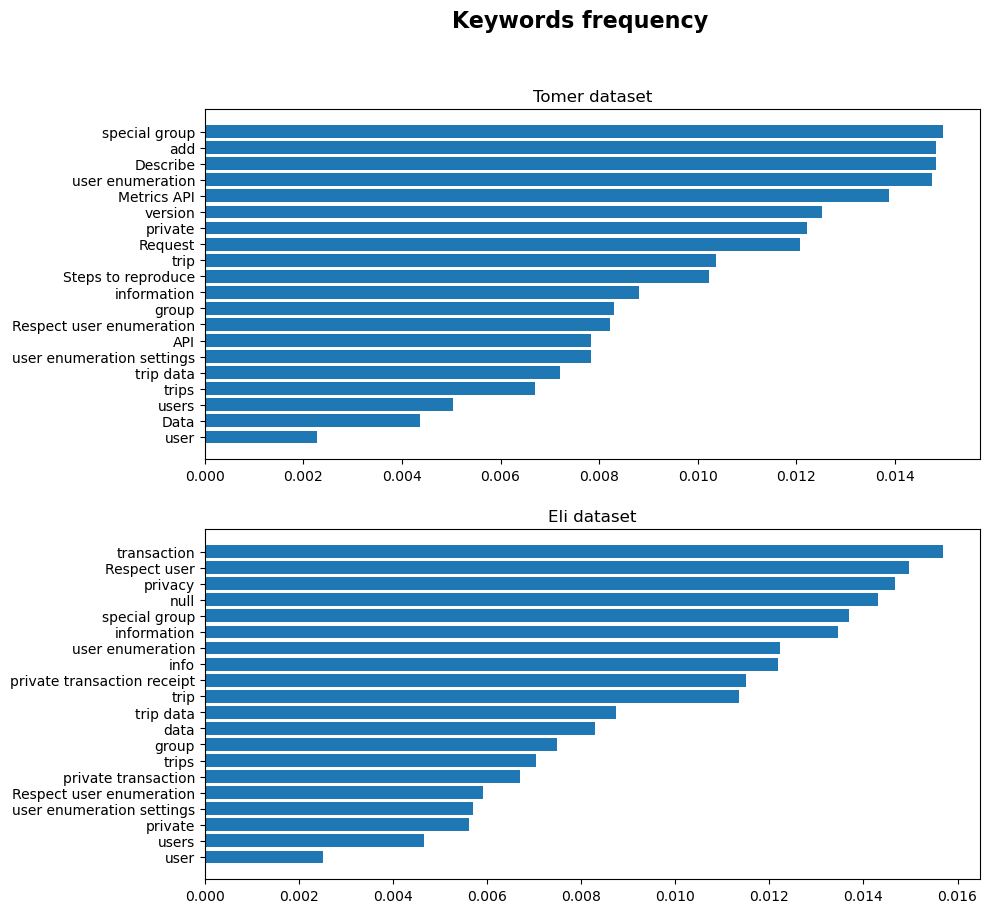

In [150]:
keywords = [w[0] for w in tomer_dataset_keywords]
frequency = [w[1] for w in tomer_dataset_keywords]
tomer_keywords_df = pd.DataFrame({"Keywords": keywords,
                                  "Frequency": frequency})
keywords = [w[0] for w in eli_dataset_keywords]
frequency = [w[1] for w in eli_dataset_keywords]
eli_keywords_df = pd.DataFrame({"Keywords": keywords,
                                  "Frequency": frequency})

# Setup plot (2 rows, 1 column)
fig, (ax0, ax1) = plt.subplots(nrows=2, # 2 rows
                               ncols=1,  
                               figsize=(10, 10))

ax0.barh(tomer_keywords_df["Keywords"], tomer_keywords_df["Frequency"])
ax1.barh(eli_keywords_df["Keywords"], eli_keywords_df["Frequency"])

ax0.set(title="Tomer dataset")
ax1.set(title="Eli dataset")

fig.suptitle("Keywords frequency", fontsize=16, fontweight="bold");

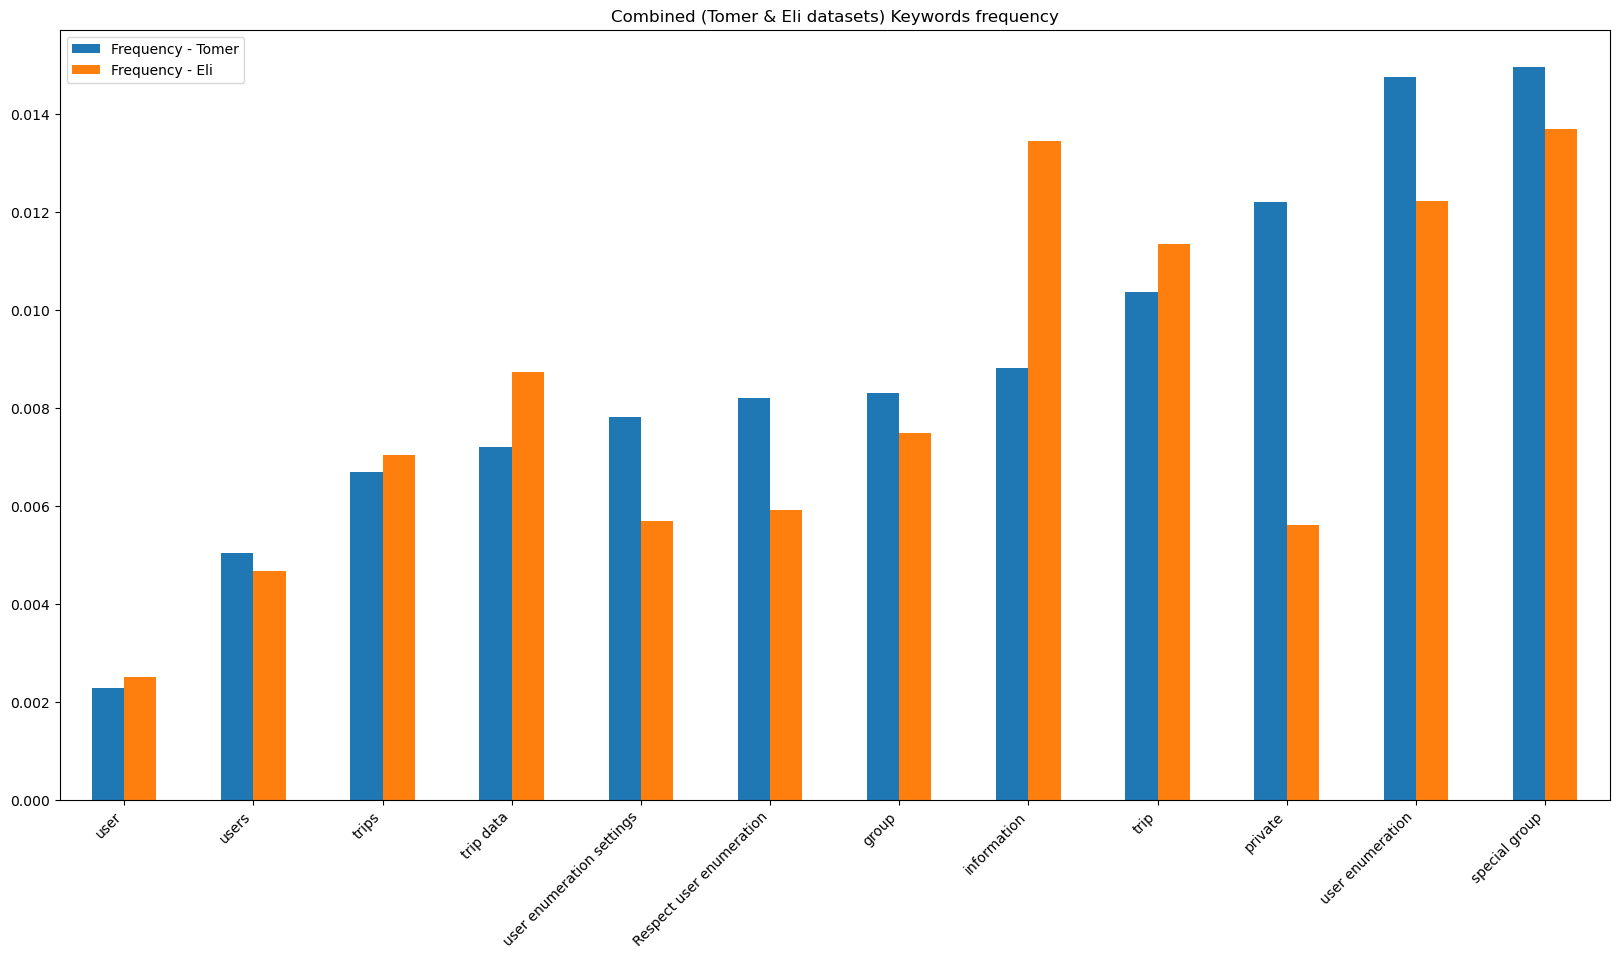

In [151]:
keywords = [w[0] for w in combined_keywords]
frequency_tomer = [w[1] for w in combined_keywords]
frequency_eli = [w[2] for w in combined_keywords]
combined_keywords_df = pd.DataFrame({"Keywords": keywords,
                                  "Frequency - Tomer": frequency_tomer,
                                    "Frequency - Eli": frequency_eli})
plot = combined_keywords_df.plot.bar(figsize=(20,10), title="Combined (Tomer & Eli datasets) Keywords frequency")
plot.set_xticklabels(keywords, rotation=45, ha='right')
plot;

In [152]:
# Getting data ready
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

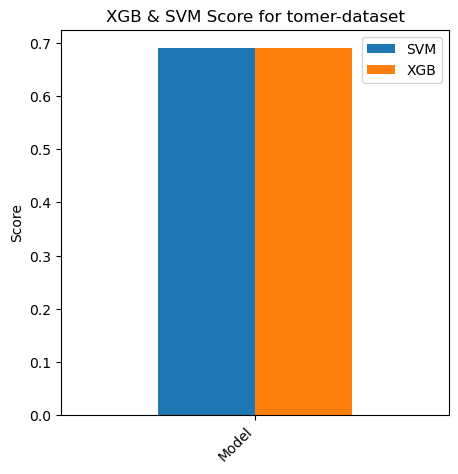

In [155]:
### Modeling for tomer-dataset ###

# Drop the rows with missing classifications
tomer_dataset_for_model = tomer_dataset.dropna(subset=["Classification"])

# Define different features and transformer pipelines
categorical_features = ["Title", "Body"]
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

# Setup preprocessing steps (convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features)])

# Create a modelling pipeline
xgb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("xgb_model", GradientBoostingClassifier())])

svm_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("svm_model", SVC())])

# Split data
X = tomer_dataset_for_model.drop("Classification", axis=1)
y = tomer_dataset_for_model["Classification"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the models
xgb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
svm_score = [svm_model.score(X_test, y_test)]
xgb_score = [xgb_model.score(X_test, y_test)]

# Analysis graph
tomer_scoring_results = pd.DataFrame({"SVM": svm_score,
                                  "XGB": xgb_score})

# Plotting the data
plot = tomer_scoring_results.plot.bar(figsize=(5,5), title="XGB & SVM Score for tomer-dataset")
plot.set(ylabel="Score")
plot.set_xticklabels(["Model"], rotation=45, ha='right')
plot;

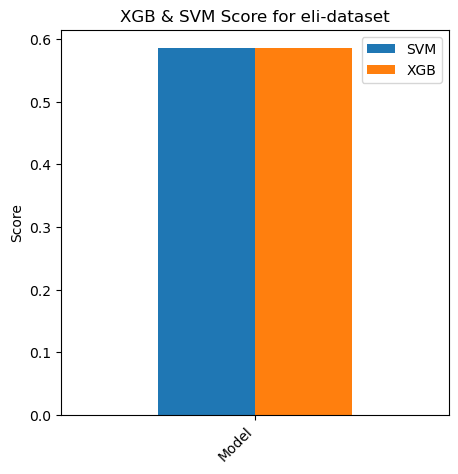

In [156]:
### Modeling for eli-dataset ###

# Drop the rows with missing classifications
eli_dataset_for_model = eli_dataset.dropna(subset=["Classification"])

# Define different features and transformer pipelines
categorical_features = ["Title", "Body"]
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

# Setup preprocessing steps (convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features)])

# Create a modelling pipeline
xgb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("xgb_model", GradientBoostingClassifier())])

svm_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("svm_model", SVC())])

# Split data
X = eli_dataset_for_model.drop("Classification", axis=1)
y = eli_dataset_for_model["Classification"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the models
xgb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
svm_score = [svm_model.score(X_test, y_test)]
xgb_score = [xgb_model.score(X_test, y_test)]

# Analysis graph
eli_scoring_results = pd.DataFrame({"SVM": svm_score,
                                  "XGB": xgb_score})

# Plotting the data
plot = eli_scoring_results.plot.bar(figsize=(5,5), title="XGB & SVM Score for eli-dataset")
plot.set(ylabel="Score")
plot.set_xticklabels(["Model"], rotation=45, ha='right')
plot;